# モジュラリティ最大化に基づくコミュニティ抽出（コミュニティの重複を考慮しない場合）
代謝ネットワークの一部（解糖系・糖新生とTCA回路）を例にして，コミュニティ検出を行います。

networkxの読み込み

In [1]:
import networkx as nx

その他ライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.6 MB/s eta 0:00:00


In [4]:
import igraph as ig

## ネットワークの読み込み

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/kztakemoto/network-analysis-in-biology/refs/heads/main/data/eco_EM%2BTCA.txt", sep='\s+', header=None)
# グラフオブジェクトの作成
g = nx.from_pandas_edgelist(df,
                           source=df.columns[0],  # 最初の列をsourceとして使用
                           target=df.columns[1],  # 2番目の列をtargetとして使用
                           create_using=nx.Graph())  # 無向グラフとして作成

# 多重エッジと自己ループの削除（必須でないが簡単のために）
g = nx.Graph(g)  # 多重エッジを自動的に削除
g.remove_edges_from(nx.selfloop_edges(g))  # 自己ループを削除

## 貪欲アルゴリズムに基づく方法

In [6]:
communities = nx.algorithms.community.greedy_modularity_communities(g)

結果の表示

In [7]:
membership = {}
for node in g.nodes():
  for i, comm in enumerate(communities, 1):
    if node in comm:
      membership[node] = i
      break

print("Community membership:", membership)

# 見つかったコミュニティの数を表示
print(f"\nNumber of communities found: {len(communities)}")

Community membership: {'2-Oxoglutarate': 5, 'Oxalosuccinate': 5, 'Succinyl-CoA': 4, '2PG': 1, '3PG': 1, 'PEP': 1, 'BPG': 3, 'Acetyl-CoA': 1, 'Citrate': 1, 'Arbutin': 2, 'Arbutin_6-phosphate': 2, 'G6P': 2, 'GAP': 3, 'Oxaloacetate': 1, 'cis-Aconitate': 5, 'D-Glucose': 2, 'F16BP': 3, 'F6P': 3, 'Glycerone_phosphate': 3, 'Fumarate': 4, 'Malate': 4, 'Succinate': 4, 'G1P': 2, 'Isocitrate': 5, 'Pyruvate': 1, 'Salicin': 2, 'Salicin_6-phosphate': 2}

Number of communities found: 5


ネットワークの描画

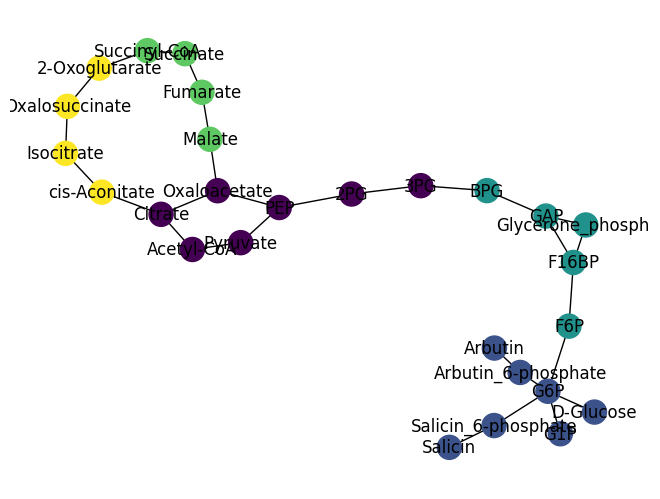

In [8]:
pos = nx.spring_layout(g, seed=1234)
nx.draw(g, pos=pos, with_labels=True, node_color=membership.values())

## スペクトル法（固有ベクトルに基づく方法）に基づく方法

networkxには実装がないので、igraphを使用

In [9]:
g_ig = ig.Graph.from_networkx(g) # networkx to igraph
data = g_ig.community_leading_eigenvector()

メンバーシップを取得し、ノード名をキーとする辞書に変換

In [10]:
nodes = list(g.nodes())
membership = {node: comm + 1 for node, comm in zip(nodes, data.membership)}

ネットワークの描画

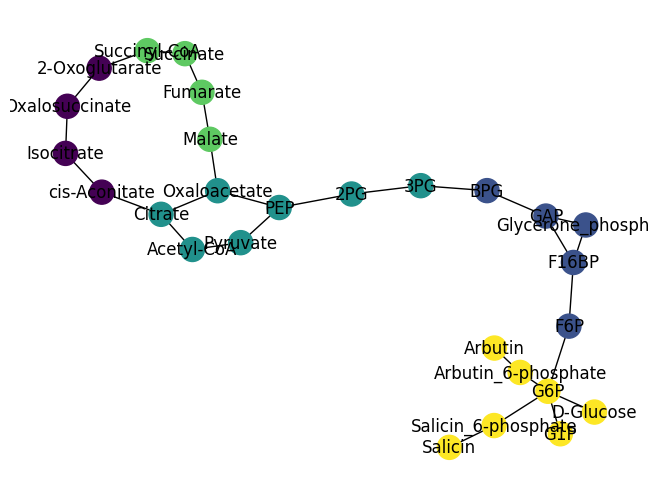

In [11]:
nx.draw(g, pos=pos, with_labels=True, node_color=membership.values())

# 焼きなまし法に基づく方法
Rライブラリrnetcartoで実行可能。詳しくはR Notebookを参照

## やってみよう
* このNotebookを参考にして，生物ネットワークを解析してみよう（``data``に様々ある）。
* Notebookを参考に自分のデータを解析してみよう。